### Данные

В этом задании мы посмотрим на инфинитивную конструкцию со значением будущего времени (типа _буду писать_), а также близкие к ней конструкции с  начинательным (_начну писать_), модальным (_могу писать_) и волитивным (_хочу писать_) значением -- как они развивались в период старорусской письменности XV-XVII вв. В этот период происходила перестройка перифрастических конструкций, которые могут иметь референцию к будущему времени, выходили из употребления и появлялись новые вспомогательные глаголы (ср. _иму писати_ и _учну купити_), см., например, [Пенькова 2023](https://languagejournal.spbu.ru/article/view/18568/11770).  
Датасет `infinitives` был собран по данным Старорусского корпуса НКРЯ и представляет собой таблицу сопряженности употребления вспомогательных глаголов и инфинитивов. В этой версии представлены только самые часто встречающиеся инфинитивы.  
В ходе работы предстоит исследовать данные методом Анализа Соответствий и применить ряд других статистических методов анализа и визуализации.

In [129]:
install.packages(c("gplots", "heatmaply", "factoextra", "FactoMineR",
"lsr", "vcd", "pheatmap", "corrplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [130]:
library(tidyverse)
library(dplyr)
library(gplots)
library(heatmaply)
library(factoextra)
library(FactoMineR)
library(lsr)
library(vcd)
library(pheatmap)
library(corrplot)

corrplot 0.95 loaded



### Проверка датасета

Пользуясь столбцом `INF`, дайте имя каждому ряду таблицы сопряженности (с помощью функции `row.names` или `column_to_rownames`). Оставьте в таблице только целочисленные данные. Выведите первые 6 строк таблицы. Проверьте, что таблица не содержит missing data.  

In [97]:
infinitives <- read_tsv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/PeriphrasticFutureMidRussian.txt", col_names = TRUE) %>% as.data.frame() %>% select(!ends_with("_Imp")) %>% select(!быти_Lform)
# сразу убираем сочетания инфинитива с формами имперфекта и с формой прошедшего времени глагола быть

Rows: 23 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): INF
dbl (24): быти_Fut, быти_Lform, мочи_Aor, мочи_Imp, мочи_Lform, мочи_Pres, н...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [98]:
infinitives_named_rows <- column_to_rownames(infinitives, 'INF')

# оставляем целочисленные значения
infinitives_named_rows %>%
  select(where(~ is.numeric(.) && all(. %% 1 == 0))) -> infinitives_named_rows

In [99]:
# пропущенных значений нет
sum(is.na(infinitives_named_rows))

[1] 0

In [100]:
# первые 6 строк
head(infinitives_named_rows, 6)

,быти_Fut,мочи_Aor,мочи_Lform,мочи_Pres,начати_Aor,начати_Fut,начати_Lform,почати_Aor,почати_Fut,почати_Lform,стати_Aor,стати_Fut,стати_Lform,учати_Aor,учати_Fut,учати_Lform,хотѣти_Aor,хотѣти_Lform,хотѣти_Pres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,0,0,1,64,1,1,3,2,13,1,23,9,0,34,26,0,14,8
быти,0,0,3,32,12,0,0,4,0,6,0,0,0,0,4,3,0,3,46
воевати,0,0,2,0,30,0,0,7,0,2,0,2,1,0,4,1,0,0,3
глаголати,6,0,1,4,81,9,0,1,0,0,1,0,0,0,2,0,0,0,6
говорити,16,0,0,0,39,5,2,1,0,86,0,17,44,0,76,46,0,5,6
дати,3,0,2,7,0,1,0,0,0,0,0,0,1,0,2,0,4,19,20


### Chisq test

Примените тест Хи-квадрат Пирсона к таблице сопряженности.

In [101]:
inf_chisq <- chisq.test(infinitives_named_rows)
inf_chisq

Warning message in chisq.test(infinitives_named_rows):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  infinitives_named_rows
X-squared = 4569.9, df = 396, p-value < 2.2e-16


**Комментарии по результатам теста**

Нулевая гипотеза: между выбором инфинитива и вспомогательного глагола не наблюдается статистически значимой связи.

Альтернативная гипотеза: существует статистически значимая связь между выбором инфинитива и вспомогательного глагола.

Применение теста хи-квадрад Пирсона показало, что между выбором инфинитива и вспомогательного глагола наблюдается статистически значимая связь (X-squared = 4569.9, df = 396, p-value < 2.2e-16)

Постройте таблицу с ожидаемыми значениями для таблицы сопряженности.

In [102]:
inf_expected <- inf_chisq$expected
inf_expected

,быти_Fut,мочи_Aor,мочи_Lform,мочи_Pres,начати_Aor,начати_Fut,начати_Lform,почати_Aor,почати_Fut,почати_Lform,стати_Aor,стати_Fut,стати_Lform,учати_Aor,учати_Fut,учати_Lform,хотѣти_Aor,хотѣти_Lform,хотѣти_Pres
бити,30.536356,0.9366980,2.4354149,12.083405,36.531223,3.5594525,0.4683490,2.9037639,0.9366980,11.989735,0.37467921,9.460650,7.961933,0.09366980,38.029940,10.303678,2.3417451,13.113772,34.938837
быти,15.756202,0.4833191,1.2566296,6.234816,18.849444,1.8366125,0.2416595,1.4982891,0.4833191,6.186484,0.19332763,4.881523,4.108212,0.04833191,19.622754,5.316510,1.2082977,6.766467,18.027802
воевати,7.250642,0.2224123,0.5782720,2.869119,8.674080,0.8451668,0.1112062,0.6894782,0.2224123,2.846878,0.08896493,2.246364,1.890505,0.02224123,9.029940,2.446536,0.5560308,3.113772,8.295979
глаголати,15.477331,0.4747648,1.2343884,6.124465,18.515825,1.8041061,0.2373824,1.4717707,0.4747648,6.076989,0.18990590,4.795124,4.035500,0.04747648,19.275449,5.222412,1.1869119,6.646707,17.708725
говорити,47.826347,1.4670659,3.8143713,18.925150,57.215569,5.5748503,0.7335329,4.5479042,1.4670659,18.778443,0.58682635,14.817365,12.470060,0.14670659,59.562874,16.137725,3.6676647,20.538922,54.721557
дати,8.226689,0.2523524,0.6561163,3.255346,9.841745,0.9589393,0.1261762,0.7822926,0.2523524,3.230111,0.10094098,2.548760,2.144996,0.02523524,10.245509,2.775877,0.6308811,3.532934,9.412746
держати,9.202737,0.2822926,0.7339607,3.641574,11.009410,1.0727117,0.1411463,0.8751069,0.2822926,3.613345,0.11291702,2.851155,2.399487,0.02822926,11.461078,3.105218,0.7057314,3.952096,10.529512
дѣлати,14.361848,0.4405475,1.1454234,5.683062,17.181352,1.6740804,0.2202737,1.3656972,0.4405475,5.639008,0.17621899,4.449530,3.744654,0.04405475,17.886228,4.846022,1.1013687,6.167665,16.432421
жаловати,7.111206,0.2181352,0.5671514,2.813944,8.507271,0.8289136,0.1090676,0.6762190,0.2181352,2.792130,0.08725406,2.203165,1.854149,0.02181352,8.856287,2.399487,0.5453379,3.053892,8.136441
жити,30.954662,0.9495295,2.4687767,12.248931,37.031651,3.6082121,0.4747648,2.9435415,0.9495295,12.153978,0.37981180,9.590248,8.071001,0.09495295,38.550898,10.444825,2.3738238,13.293413,35.417451


Предложите анализ теста Хи-квадрат. Что можно сказать об ассоциации между конструкциями (они обозначены вспомогательными глаголами в той или иной временной форме) и инфинитивами? Какие проблемы вы видите в применении теста Хи-квадрат к этим данным?

**Ответ**

Анализ ассоциаций между конструкциями я привела выше.

Проблема с этими данными заключается в том, что они достаточно сильно не сбалансированы. Это не было бы проблемой, если бы ожидаемые значения в каждой ячейке были бы не меньше 5 наблюдений, однако, как видно из таблицы `inf_expected`, этого не происходит.

### Baloon plot

С помощью функции `balloonplot` визуализируем данные в таблице сопряженности.

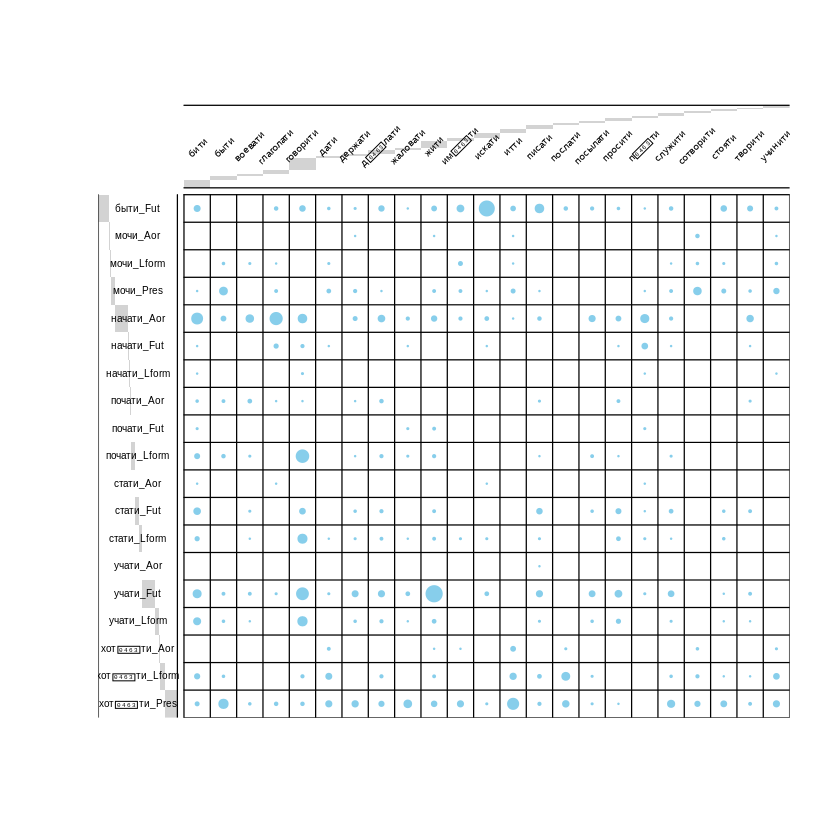

In [103]:
infinitives_named_rows |> as.matrix() |> as.table() |>
  balloonplot(main ="", xlab ="", ylab="",
              label = FALSE, show.margins = FALSE, text.size=0.5, colsrt=45, colmar=3, rowmar=3)

### Хи-квадрат на меньшей таблице

Оставьте меньшее количество строк и столбцов в таблице (вы можете убирать те или иные столбцы или объединять данные из нескольких столбцов или строк). Результирующая таблица должна быть размером не меньше 3 x 3 и корректна для проведения теста Хи-квадрат. Проведите снова тест Хи-квадрат и запишите ваши выводы.

In [104]:
# у нас есть вспомогательные глаголы в различных формах. давайте пренебрежем
# этими данными и объединим столбики разных форм в один

inf_aux <- infinitives_named_rows

# переименуем столбец с быть: он единственный содержит только одну форму
names(inf_aux)[names(infinitives_named_rows) == 'быти_Fut'] <- 'быти'

# теперь сделаем саммари
inf_aux <- inf_aux %>%
  mutate('быти' = rowSums(select(., contains('быти'))))
inf_aux <- inf_aux %>%
  mutate('мочи' = rowSums(select(., contains('мочи'))))
inf_aux <- inf_aux %>%
  mutate('начати' = rowSums(select(., contains('начати'))))
inf_aux <- inf_aux %>%
  mutate('почати' = rowSums(select(., contains('почати'))))
inf_aux <- inf_aux %>%
  mutate('стати' = rowSums(select(., contains('стати'))))
inf_aux <- inf_aux %>%
  mutate('учати' = rowSums(select(., contains('учати'))))
inf_aux <- inf_aux %>%
  mutate('хотѣти' = rowSums(select(., contains('хотѣти'))))

# выбираем нужные колонки
inf_aux <- inf_aux[, c('быти', 'мочи', 'начати', 'почати', 'стати', 'учати', 'хотѣти')]
inf_aux

,быти,мочи,начати,почати,стати,учати,хотѣти
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,1,66,18,33,60,22
быти,0,35,12,10,0,7,49
воевати,0,2,30,9,3,5,3
глаголати,6,5,90,1,1,2,6
говорити,16,0,46,87,61,122,11
дати,3,9,1,0,1,2,43
держати,2,6,8,2,5,22,21
дѣлати,15,1,23,11,9,25,19
жаловати,1,0,6,4,1,8,31


In [105]:
# смотрим на таблицу с ожидаемыми значениями
inf_aux_expected <- chisq.test(inf_aux)$expected
inf_aux_expected

Warning message in chisq.test(inf_aux):
“Chi-squared approximation may be incorrect”


,быти,мочи,начати,почати,стати,учати,хотѣти
бити,30.536356,15.455518,40.559025,15.830197,17.797263,48.42729,50.39435
быти,15.756202,7.974765,20.927716,8.168092,9.183062,24.98760,26.00257
воевати,7.250642,3.669803,9.630453,3.758768,4.225834,11.49872,11.96578
глаголати,15.477331,7.833618,20.557314,8.023524,9.020530,24.54534,25.54234
говорити,47.826347,24.206587,63.523952,24.793413,27.874251,75.84731,78.92814
дати,8.226689,4.163815,10.926861,4.264756,4.794696,13.04662,13.57656
держати,9.202737,4.657827,12.223268,4.770744,5.363559,14.59453,15.18734
дѣлати,14.361848,7.269033,19.075706,7.445252,8.370402,22.77630,23.70145
жаловати,7.111206,3.599230,9.445252,3.686484,4.144568,11.27759,11.73567
жити,30.954662,15.667237,41.114628,16.047049,18.041061,49.09068,51.08469


In [106]:
# оставим только те строки, где для всех столбиков значения больше 5
inf_aux_expected <- inf_aux_expected[rowSums(inf_aux_expected >= 5) == ncol(inf_aux_expected), ]
inf_aux_expected

,быти,мочи,начати,почати,стати,учати,хотѣти
бити,30.53636,15.455518,40.55902,15.830197,17.797263,48.42729,50.39435
быти,15.75620,7.974765,20.92772,8.168092,9.183062,24.98760,26.00257
глаголати,15.47733,7.833618,20.55731,8.023524,9.020530,24.54534,25.54234
говорити,47.82635,24.206587,63.52395,24.793413,27.874251,75.84731,78.92814
дѣлати,14.36185,7.269033,19.07571,7.445252,8.370402,22.77630,23.70145
жити,30.95466,15.667237,41.11463,16.047049,18.041061,49.09068,51.08469
искати,20.21814,10.233105,26.85415,10.481180,11.783576,32.06373,33.36612
итти,17.01112,8.609923,22.59453,8.818648,9.914457,26.97776,28.07357
писати,14.22241,7.198460,18.89050,7.372968,8.289136,22.55518,23.47134
просити,10.45766,5.292985,13.89008,5.421300,6.094953,16.58469,17.25834


In [107]:
# поместим строки из этого датафрейма в новый
inf_aux_fin <- inf_aux[rownames(inf_aux) %in% rownames(inf_aux_expected), ]
inf_aux_fin

,быти,мочи,начати,почати,стати,учати,хотѣти
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,1,66,18,33,60,22
быти,0,35,12,10,0,7,49
глаголати,6,5,90,1,1,2,6
говорити,16,0,46,87,61,122,11
дѣлати,15,1,23,11,9,25,19
жити,12,5,15,9,8,152,21
искати,124,1,8,0,3,7,2
итти,11,10,1,0,0,0,100
писати,39,1,6,3,18,23,12


In [108]:
# проведем тест хи-квадрат и интерпретируем результаты
inf_aux_fin_chisq <- chisq.test(inf_aux_fin)
inf_aux_fin_chisq

Warning message in chisq.test(inf_aux_fin):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  inf_aux_fin
X-squared = 2159.4, df = 60, p-value < 2.2e-16


Применение теста хи-квадрад Пирсона показало, что между выбором инфинитива и вспомогательного глагола наблюдается статистически значимая связь (X-squared = 2159.4, df = 60, p-value < 2.2e-16). Также мне кажется важным отметить, что методологически это делает больше смысла: в предыдущем случае у нас в таблице содержались данные не только о вспомогательном глаголе, но и о его форме, что является дополнительным фактором.

Вычислите величину эффекта для теста с помощью V Крамера.

In [109]:
cramersV(table(as.matrix(inf_aux_fin)))

Warning message in stats::chisq.test(...):
“Chi-squared approximation may be incorrect”


[1] 0.138562

Наблюдается слабая величина эффекта при выборе вспомогательного глагола для инфинитива (при этом p-value достаточно маленькое). Возможно, дело в том, что сама по себе получившаяся таблица очень большая, и в итоге действует большое количество степеней свободы (в нашем случае 60).

Визуализируйте таблицу с помощью мозаичного графика.

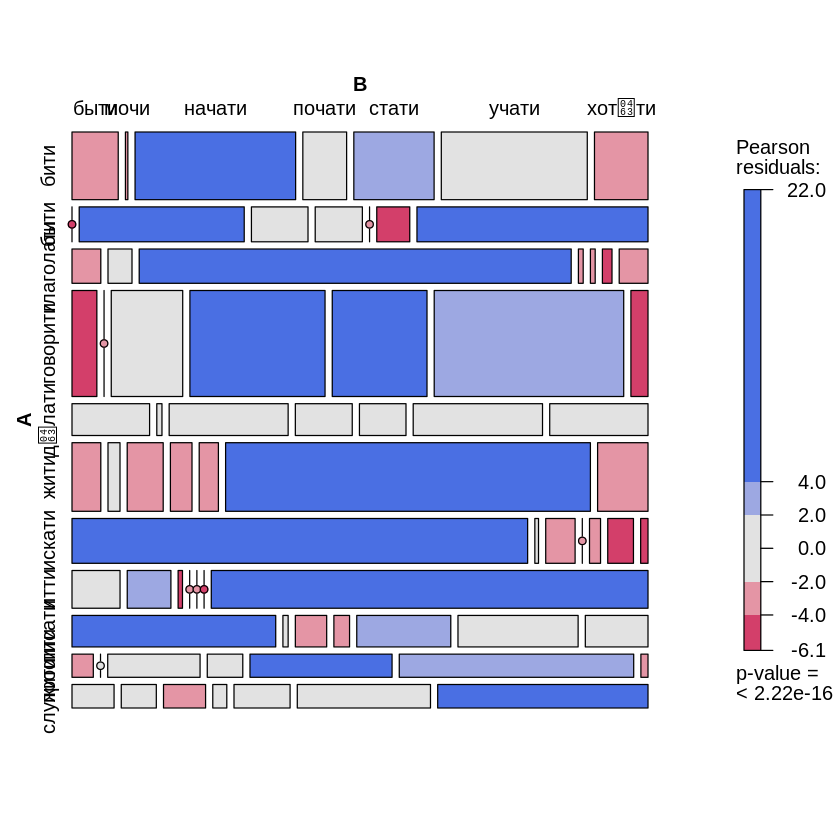

In [110]:
inf_aux_matrix <- as.matrix(inf_aux_fin)
mosaic(inf_aux_matrix,
       shade = TRUE)

Запишите ваши выводы по ассоциации данных в меньшей таблице.

**Ответ**

Из этой таблицы можно увидеть, что в качестве вспомогательного глагола используется преимущественно с начинательными глаголами, а также "стати". Это выглядит достаточно логично, поскольку такие конструкции более общие по значению и более прототипические (в отличие от, например, "хотеть"). Интересно, что глагол "быть" при этом употребляется не столь часто, что может быть связано с тем, что он все больше подвергался грамматикализации в этот период.

### Интерактивная тепловая карта  

Вернемся к полной таблице сопряженности. Используйте функцию `heatmaply` для интерактивной визуализации ассоциации между строками и столбцами.

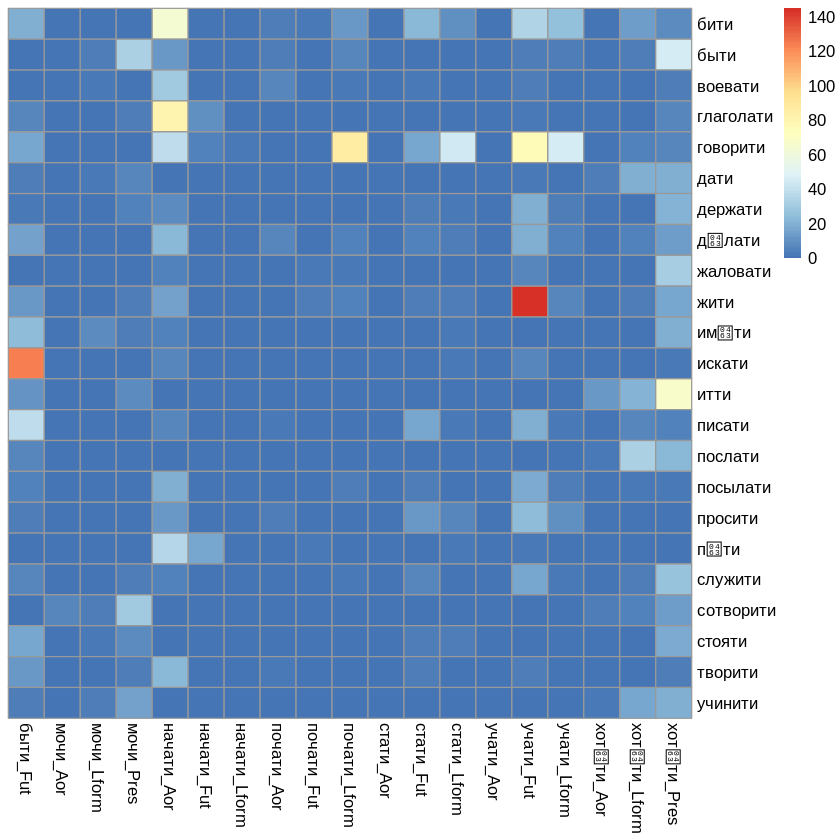

In [127]:
# не получилось сделать через heatmaply, сделала через другую библиотеку, чтобы
# в колабе показывалась картинка

pheatmap(as.matrix(infinitives_named_rows),
cluster_rows = FALSE,
cluster_cols = FALSE) # там были ветки дендрограммы, убрала их

### Анализ соответствий  

В этом разделе мы предлагаем использовать пакеты `factoextra` и `FactoMineR`, но вы можете использовать и другие пакеты R.
Постройте модель анализа соответствий и запишите ее в переменную `ca.model`. Выведите summary модели.  

In [128]:
ca.model <- CA(infinitives_named_rows, ncp = 3, graph = FALSE)
summary(ca.model)


Call:
CA(X = infinitives_named_rows, ncp = 3, graph = FALSE) 

The chi square of independence between the two variables is equal to 4569.931 (p-value =  0 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.547   0.370   0.315   0.181   0.167   0.103   0.098
% of var.             27.992  18.944  16.115   9.277   8.555   5.256   5.004
Cumulative % of var.  27.992  46.936  63.051  72.329  80.884  86.140  91.144
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.049   0.035   0.030   0.023   0.013   0.011   0.007
% of var.              2.509   1.773   1.520   1.188   0.684   0.558   0.344
Cumulative % of var.  93.652  95.425  96.945  98.133  98.817  99.375  99.719
                      Dim.15  Dim.16  Dim.17  Dim.18
Variance               0.003   0.002   0.001   0.000
% of var.              0.130   0.090   0.051   0.010
Cumulative % of var.  99.849  99.939  99.990 100.000


### Screeplot

Визуализируйте screeplot.

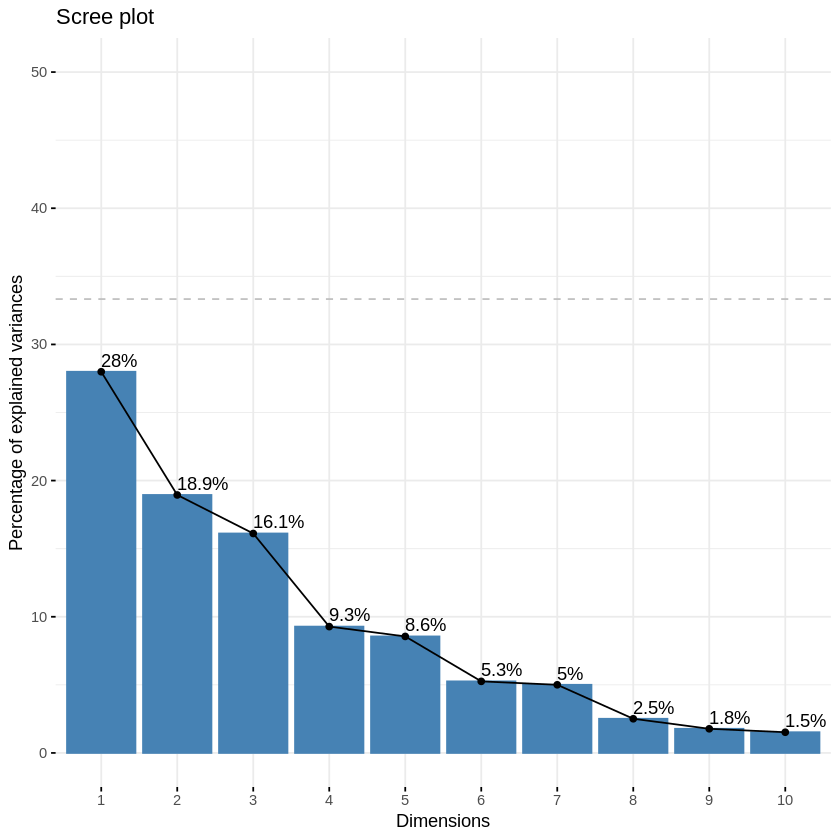

In [131]:
fviz_screeplot(ca.model, addlabels = TRUE, ylim = c(0, 50)) +
  geom_hline(yintercept=33.33, linetype=2, color="grey")

Запишите ваши выводы, какую долю объясненной дисперсии представляют первые два измерения?

**Ответ**

Доля объясненной дисперсии составляет 27.992% для Dim1 и 18.944% для Dim2, в сумме первые два измерения объясняют около 47% дисперсии. Также p-value при тесте хи-квадрат равно ~0, из чего можно сделать вывод, что значения не случайны, и CA способен выявить имеющиеся закономерности.

### Biplot  

Постройте базовый биплот.

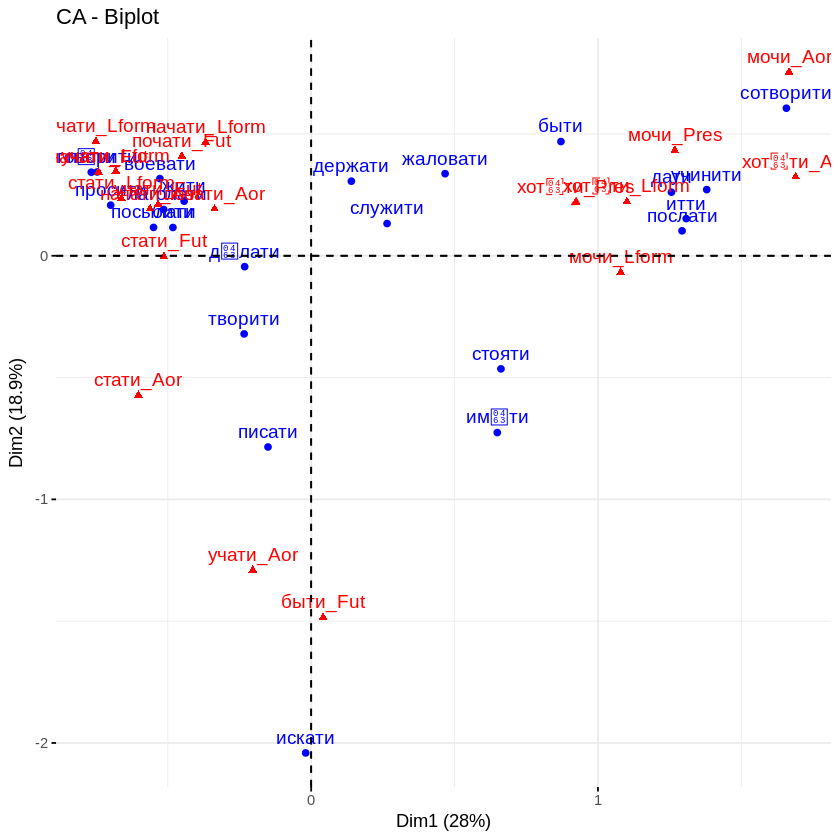

In [132]:
fviz_ca_biplot(ca.model)

Постройте плот для данных в столбцах. Цвет должен отражать сontribution каждого конкретного столбца.

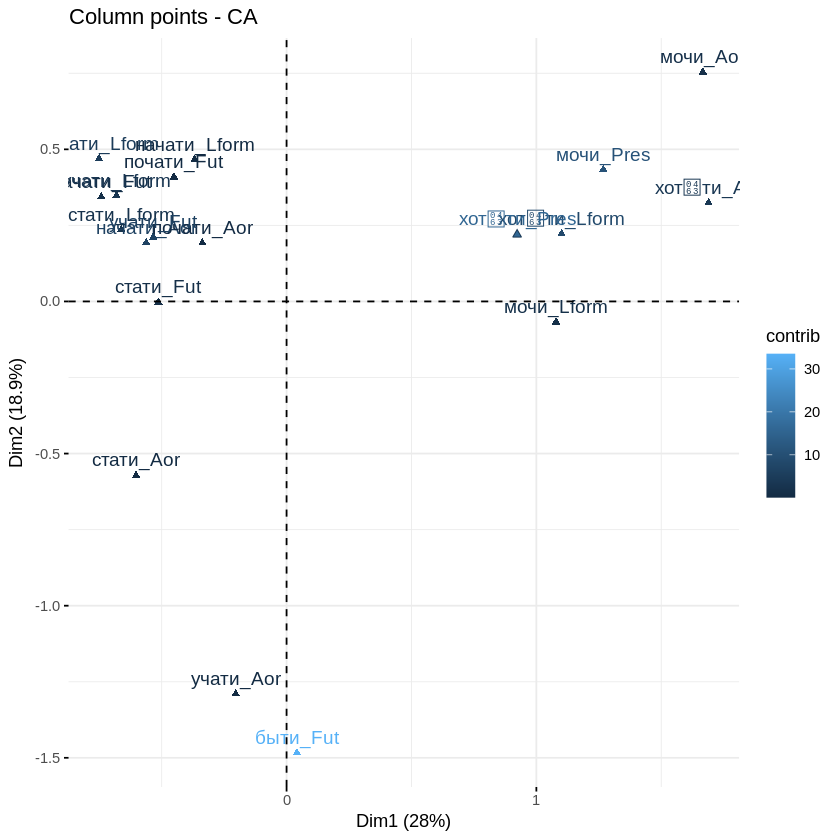

In [138]:
fviz_ca_col(ca.model, col.col="contrib")

Здесь вы можете построить более продвинутый биплот с использованием цвета, прозрачности, repel.

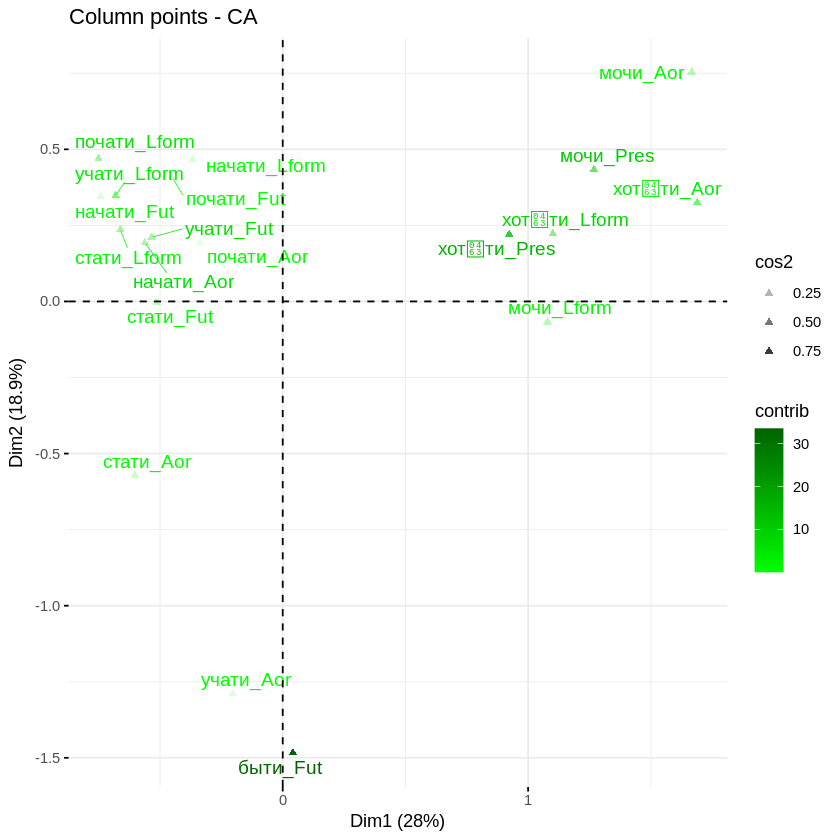

In [143]:
# захотела зеленый :)
fviz_ca_col(ca.model, col.col = "contrib",
 gradient.cols = c("#00FF00", "#006400"),
 alpha.col = "cos2",
 repel = TRUE,
 ggtheme = theme_minimal())

### Выводы  

Предложите ваш анализ визуализаций, полученных методом Анализа соответствий.

**Ответ**



### Дополнительное задание  

1)Посчитайте метрику pmi (pointwise mutual information) для сочетания каждой конструкции и каждого инфинитива.

2) Выведите топ-10 пар с наибольшим значением метрики.

3) Визуализируйте данные с помощью коррелограммы, используя функцию `corrplot` из одноименного пакета.

4) Постройте 2D-визуализацию получившейся таблицы с непрерывными данными, пользуясь Методом главных компонент (PC1 и PC2).  

5) Запишите ваши выводы по анализу PCA.

6) Сравните результаты CA и PCA.